In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [2]:
df = pd.read_csv("../data/lille_2022.csv")

In [3]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,0,1.0,Maison,NaN,82.0,5.0,S,NaN,70.0,2681.707317
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,2,2.0,Appartement,NaN,63.0,3.0,NaN,NaN,NaN,2936.507937
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN,inf


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11354 entries, 0 to 11353
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identifiant de document     0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              11354 non-null  int64  
 8   Date mutation               11354 non-null  object 
 9   Nature mutation             11354 non-null  object 
 10  Valeur fonciere             11354 non-null  float64
 11  No voie                     11248 non-null  float64
 12  B/T/Q                       652 non-null    object 
 13  Type de voie                113

In [5]:
df.describe()

/Users/Simplon/Cours/api_rest/projets/IA&Immobilier/.venv/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/Simplon/Cours/api_rest/projets/IA&Immobilier/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Valeur fonciere,No voie,...,4eme lot,5eme lot,Nombre de lots,Code type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture speciale,Surface terrain,prix_m2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11354.000000,1.135400e+04,11248.000000,...,106.000000,50.000000,11354.000000,11354.000000,0.0,11354.000000,11354.000000,0.0,3672.000000,1.135400e+04
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.003963,6.906027e+05,199.709015,...,84.905660,94.180000,0.957812,2.472521,NaN,42.131760,1.323146,NaN,236.449619,inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.062833,2.354745e+06,1072.930117,...,373.543662,346.065388,0.899357,0.789471,NaN,175.379622,1.666542,NaN,629.515964,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000e+00,1.000000,...,3.000000,7.000000,0.000000,1.000000,NaN,0.000000,0.000000,NaN,4.000000,1.347709e-04
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.545000e+05,13.000000,...,7.000000,9.000000,0.000000,2.000000,NaN,0.000000,0.000000,NaN,78.000000,3.851514e+03
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.275175e+05,35.000000,...,9.000000,19.000000,1.000000,2.000000,NaN,22.000000,1.000000,NaN,124.000000,1.685750e+04
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.651500e+05,91.000000,...,31.000000,32.000000,1.000000,3.000000,NaN,59.000000,2.000000,NaN,221.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,6.180000e+07,9999.000000,...,3004.000000,2256.000000,17.000000,4.000000,NaN,10945.000000,14.000000,NaN,18147.000000,inf


In [6]:
df = df[df["Nombre pieces principales"] >= 4.0]
df.head(20)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,0,1.0,Maison,NaN,82.0,5.0,S,NaN,70.0,2681.707317
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,0,1.0,Maison,NaN,165.0,4.0,S,NaN,121.0,1848.484848
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,0,1.0,Maison,NaN,96.0,5.0,S,NaN,99.0,2395.833333
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,1,2.0,Appartement,NaN,92.0,4.0,NaN,NaN,NaN,3989.130435
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,0,1.0,Maison,NaN,60.0,5.0,S,NaN,32.0,1916.666667
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,2,2.0,Appartement,NaN,70.0,4.0,NaN,NaN,NaN,2428.571429
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/01/2022,Vente,...,0,1.0,Maison,NaN,91.0,5.0,S,NaN,176.0,2835.164835
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2022,Vente,...,0,1.0,Maison,NaN,80.0,5.0,S,NaN,92.0,2962.500000
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,2,2.0,Appartement,NaN,105.0,4.0,NaN,NaN,NaN,3383.809524
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,2.0,Appartement,NaN,120.0,4.0,NaN,NaN,NaN,3937.500000


In [7]:
df.shape[0]

1379

In [8]:
df["prix_m2"] = df["Valeur fonciere"] / df["Surface reelle bati"]
df.head(20)

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,prix_m2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,0,1.0,Maison,NaN,82.0,5.0,S,NaN,70.0,2681.707317
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2022,Vente,...,0,1.0,Maison,NaN,165.0,4.0,S,NaN,121.0,1848.484848
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,0,1.0,Maison,NaN,96.0,5.0,S,NaN,99.0,2395.833333
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,1,2.0,Appartement,NaN,92.0,4.0,NaN,NaN,NaN,3989.130435
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,0,1.0,Maison,NaN,60.0,5.0,S,NaN,32.0,1916.666667
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2022,Vente,...,2,2.0,Appartement,NaN,70.0,4.0,NaN,NaN,NaN,2428.571429
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12/01/2022,Vente,...,0,1.0,Maison,NaN,91.0,5.0,S,NaN,176.0,2835.164835
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,10/01/2022,Vente,...,0,1.0,Maison,NaN,80.0,5.0,S,NaN,92.0,2962.500000
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,2,2.0,Appartement,NaN,105.0,4.0,NaN,NaN,NaN,3383.809524
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2022,Vente,...,1,2.0,Appartement,NaN,120.0,4.0,NaN,NaN,NaN,3937.500000


In [9]:
df_appartements = df[df["Type local"] == "Appartement"]
df_appartements.shape[0]

561

In [10]:
df_maisons = df[df["Type local"] == "Maison"]
df_maisons.shape[0]

818

In [11]:
df_appartements = df_appartements[["Surface reelle bati", "Nombre pieces principales", "Type local", "Surface terrain", "Nombre de lots", "Valeur fonciere", "prix_m2"]]
df_appartements.head(25)


,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
23,92.0,4.0,Appartement,NaN,1,367000.0,3989.130435
26,70.0,4.0,Appartement,NaN,2,170000.0,2428.571429
58,105.0,4.0,Appartement,NaN,2,355300.0,3383.809524
62,120.0,4.0,Appartement,NaN,1,472500.0,3937.500000
113,71.0,4.0,Appartement,NaN,1,229900.0,3238.028169
141,120.0,5.0,Appartement,NaN,4,455000.0,3791.666667
156,149.0,5.0,Appartement,NaN,1,595250.0,3994.966443
169,142.0,6.0,Appartement,NaN,1,1.0,0.007042
224,128.0,5.0,Appartement,NaN,2,426300.0,3330.468750
245,76.0,4.0,Appartement,NaN,2,205000.0,2697.368421


In [12]:
df_maisons = df_appartements[["Surface reelle bati", "Nombre pieces principales", "Type local", "Surface terrain", "Nombre de lots", "Valeur fonciere", "prix_m2"]]
df_maisons.head(25)

,Surface reelle bati,Nombre pieces principales,Type local,Surface terrain,Nombre de lots,Valeur fonciere,prix_m2
23,92.0,4.0,Appartement,NaN,1,367000.0,3989.130435
26,70.0,4.0,Appartement,NaN,2,170000.0,2428.571429
58,105.0,4.0,Appartement,NaN,2,355300.0,3383.809524
62,120.0,4.0,Appartement,NaN,1,472500.0,3937.500000
113,71.0,4.0,Appartement,NaN,1,229900.0,3238.028169
141,120.0,5.0,Appartement,NaN,4,455000.0,3791.666667
156,149.0,5.0,Appartement,NaN,1,595250.0,3994.966443
169,142.0,6.0,Appartement,NaN,1,1.0,0.007042
224,128.0,5.0,Appartement,NaN,2,426300.0,3330.468750
245,76.0,4.0,Appartement,NaN,2,205000.0,2697.368421


In [13]:
# Je ne supprime pas les lignes avec des valeurs manquantes sur terrain Sinon le dataset ne permet plus de faire des estimations
df_appartements.isna().sum()

Surface reelle bati            0
Nombre pieces principales      0
Type local                     0
Surface terrain              508
Nombre de lots                 0
Valeur fonciere                0
prix_m2                        0
dtype: int64

In [14]:
# Je ne supprime pas les lignes avec des valeurs manquantes sur terrain Sinon le dataset ne permet plus de faire des estimations
df_maisons.isna().sum()

Surface reelle bati            0
Nombre pieces principales      0
Type local                     0
Surface terrain              508
Nombre de lots                 0
Valeur fonciere                0
prix_m2                        0
dtype: int64

In [15]:
df_appartements.shape[0]

561

In [16]:
def remove_outliers_iqr(df, column):
    """
    Supprime les valeurs aberrantes d'une colonne numérique dans un DataFrame,
    en utilisant la méthode de l'IQR. Modifie le DataFrame en place et affiche
    le nombre de lignes supprimées.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    nb_outliers = len(outlier_indices)

    df.drop(outlier_indices, inplace=True)
    print(f"{nb_outliers} valeur(s) aberrante(s) supprimée(s) dans la colonne '{column}'.")


In [17]:
remove_outliers_iqr(df_appartements, "prix_m2")
df_appartements.shape[0]

63 valeur(s) aberrante(s) supprimée(s) dans la colonne 'prix_m2'.


498

In [18]:
remove_outliers_iqr(df_appartements, "Valeur fonciere")
df_appartements.shape[0]

18 valeur(s) aberrante(s) supprimée(s) dans la colonne 'Valeur fonciere'.


480

In [19]:
remove_outliers_iqr(df_appartements, "Surface reelle bati")
df_appartements.shape[0]

20 valeur(s) aberrante(s) supprimée(s) dans la colonne 'Surface reelle bati'.


460

In [20]:
remove_outliers_iqr(df_maisons, "prix_m2")
df_maisons.shape[0]

63 valeur(s) aberrante(s) supprimée(s) dans la colonne 'prix_m2'.


498

In [21]:
remove_outliers_iqr(df_maisons, "Valeur fonciere")
df_maisons.shape[0]

18 valeur(s) aberrante(s) supprimée(s) dans la colonne 'Valeur fonciere'.


480

In [22]:
remove_outliers_iqr(df_maisons, "Surface reelle bati")
df_maisons.shape[0]

20 valeur(s) aberrante(s) supprimée(s) dans la colonne 'Surface reelle bati'.


460

modele LinearRegression

In [23]:
X = df_appartements[['Valeur fonciere']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)


In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleur paramètre alpha :", grid.best_params_)

Meilleur paramètre alpha : {'alpha': 10.0}


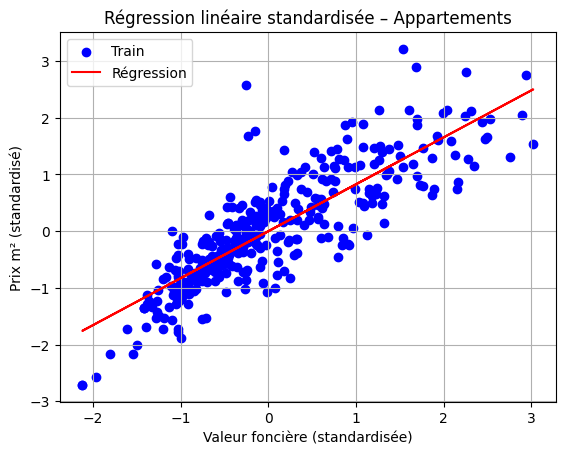

In [26]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.plot(X_train_scaled, y_train_pred_scaled, color='red', label='Régression')
plt.title("Régression linéaire standardisée – Appartements")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
y_pred_scaled = model.predict(X_test_scaled)
mse_linear_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_linear_app)
print("RMSE Appartements :", np.sqrt(mse_linear_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

MSE Appartements : 0.24161331976743028
RMSE Appartements : 0.49154177825229695
R² Appartements : 0.6417747618402536


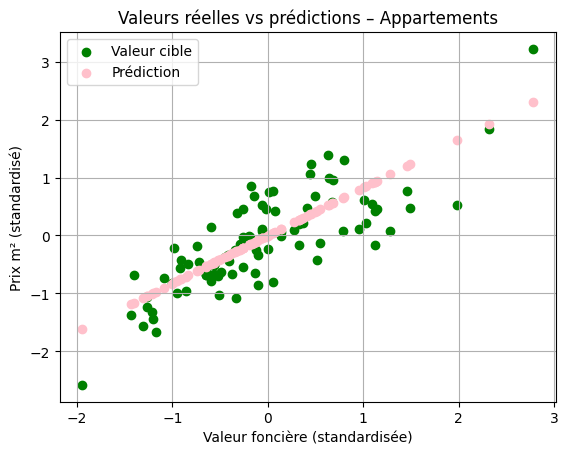

In [28]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("Valeurs réelles vs prédictions – Appartements")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import os

racine = "sauvegardes"
modeles = ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", "XGBRegressor"]
types_bien = ["appartements", "maisons"]

for modele in modeles:
    for type_bien in types_bien:
        os.makedirs(os.path.join(racine, modele, type_bien), exist_ok=True)

In [36]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/LinearRegression/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/LinearRegression/appartements/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/LinearRegression/appartements/app_scaler_y.pkl")

['sauvegardes/LinearRegression/appartements/app_scaler_y.pkl']

In [37]:
X = df_maisons[['Valeur fonciere']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleur paramètre alpha :", grid.best_params_)

Meilleur paramètre alpha : {'alpha': 10.0}


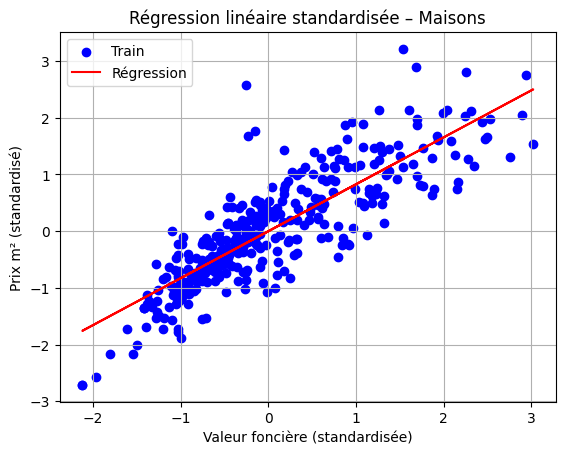

In [40]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.plot(X_train_scaled, y_train_pred_scaled, color='red', label='Régression')
plt.title("Régression linéaire standardisée – Maisons")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_linear_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_linear_mais)
print("RMSE Maisons :", np.sqrt(mse_linear_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

MSE Maisons : 0.24161331976743028
RMSE Maisons : 0.49154177825229695
R² Maisons : 0.6417747618402536


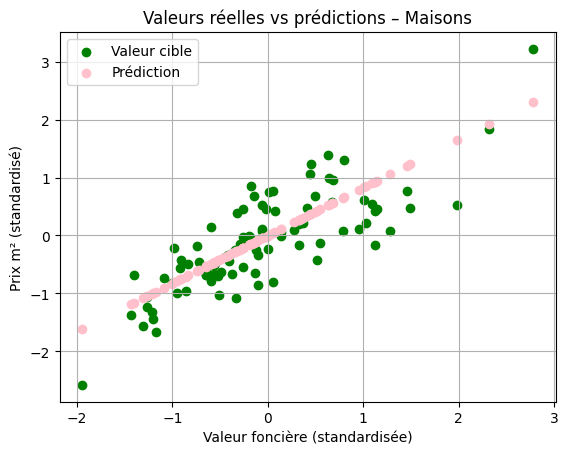

In [42]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("Valeurs réelles vs prédictions – Maisons")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/LinearRegression/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/LinearRegression/maisons/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/LinearRegression/maisons/app_scaler_y.pkl")

['sauvegardes/LinearRegression/maisons/app_scaler_y.pkl']

modèle DecisionTreeRegressor

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [45]:
X = df_appartements[['Valeur fonciere']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleurs paramètres (Appartements) :", grid.best_params_)

Meilleurs paramètres (Appartements) : {'max_depth': 4, 'min_samples_split': 2}


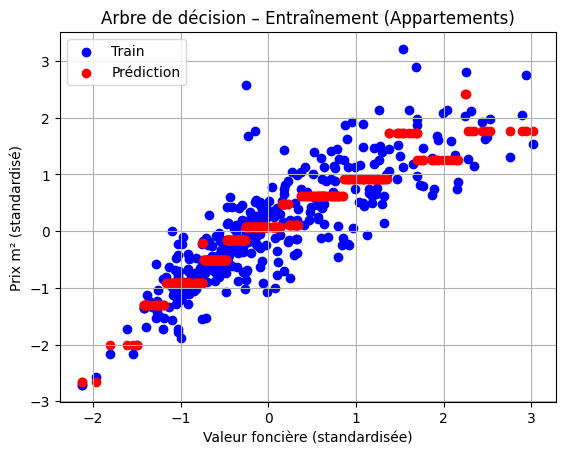

In [48]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled, y_train_pred_scaled, color='red', label='Prédiction')
plt.title("Arbre de décision – Entraînement (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_tree_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_tree_app)
print("RMSE Appartements :", np.sqrt(mse_tree_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

MSE Appartements : 0.25218743673677985
RMSE Appartements : 0.502182672676766
R² Appartements : 0.6260971676855919


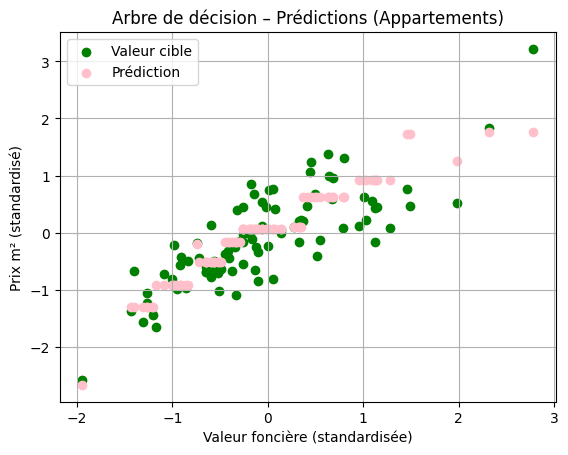

In [50]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("Arbre de décision – Prédictions (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [51]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/DecisionTreeRegressor/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/DecisionTreeRegressor/appartements/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/DecisionTreeRegressor/appartements/app_scaler_y.pkl")

['sauvegardes/DecisionTreeRegressor/appartements/app_scaler_y.pkl']

In [52]:
X = df_maisons[['Valeur fonciere']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled)

model = grid.best_estimator_
print("Meilleurs paramètres (Maisons) :", grid.best_params_)

Meilleurs paramètres (Maisons) : {'max_depth': 4, 'min_samples_split': 2}


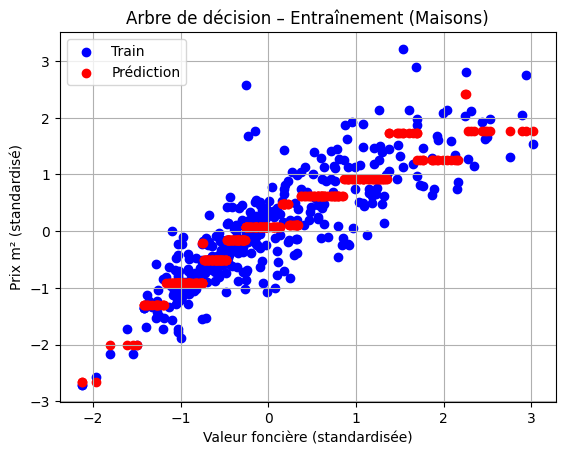

In [55]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled, y_train_pred_scaled, color='red', label='Prédiction')
plt.title("Arbre de décision – Entraînement (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_tree_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_tree_mais)
print("RMSE Maisons :", np.sqrt(mse_tree_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

MSE Maisons : 0.25218743673677985
RMSE Maisons : 0.502182672676766
R² Maisons : 0.6260971676855919


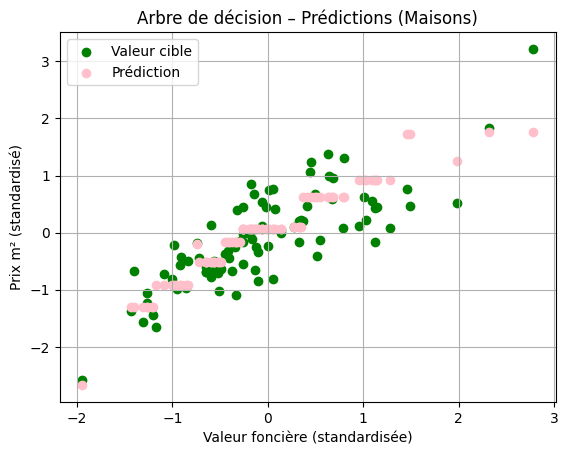

In [57]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("Arbre de décision – Prédictions (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [58]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/DecisionTreeRegressor/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/DecisionTreeRegressor/maisons/app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/DecisionTreeRegressor/maisons/app_scaler_y.pkl")

['sauvegardes/DecisionTreeRegressor/maisons/app_scaler_y.pkl']

modèle RandomForestRegressor

In [59]:
X = df_appartements[['Valeur fonciere']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Appartements) :", grid.best_params_)

Meilleurs paramètres (Appartements) : {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}


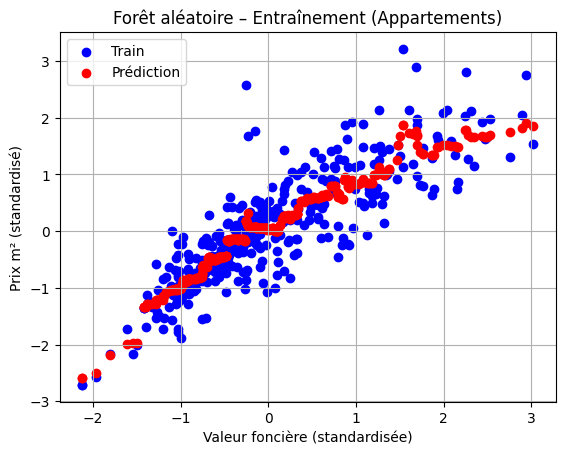

In [63]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled, y_train_pred_scaled, color='red', label='Prédiction')
plt.title("Forêt aléatoire – Entraînement (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_forest_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_forest_app)
print("RMSE Appartements :", np.sqrt(mse_forest_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

MSE Appartements : 0.2484454148870494
RMSE Appartements : 0.49844299060880515
R² Appartements : 0.6316452337839716


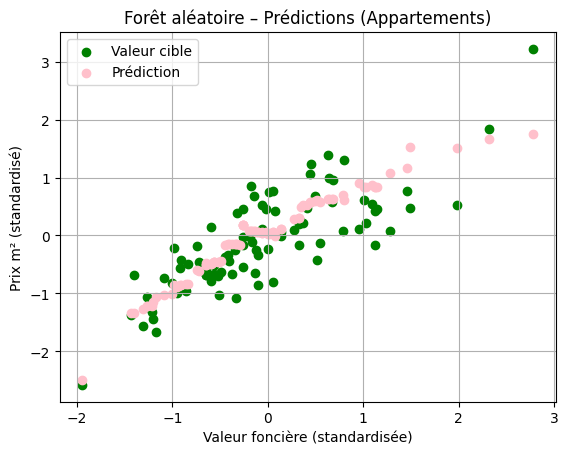

In [65]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("Forêt aléatoire – Prédictions (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [66]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/RandomForestRegressor/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/RandomForestRegressor/appartements//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/RandomForestRegressor/appartements//app_scaler_y.pkl")

['sauvegardes/RandomForestRegressor/appartements//app_scaler_y.pkl']

modele RandomForestRegressor

In [67]:
X = df_maisons[['Valeur fonciere']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Maisons) :", grid.best_params_)

Meilleurs paramètres (Maisons) : {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}


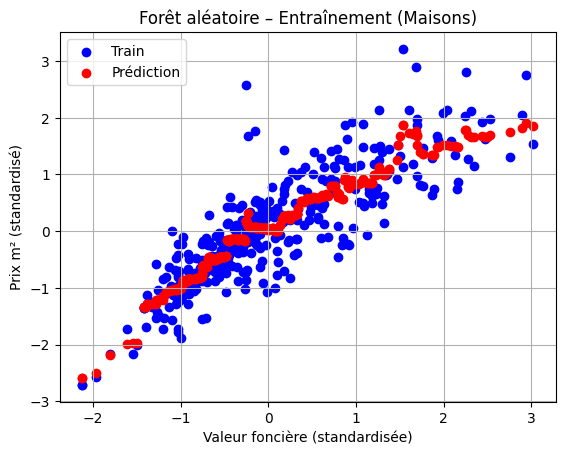

In [71]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled, y_train_pred_scaled, color='red', label='Prédiction')
plt.title("Forêt aléatoire – Entraînement (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_forest_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_forest_mais)
print("RMSE Maisons :", np.sqrt(mse_forest_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

MSE Maisons : 0.2484454148870494
RMSE Maisons : 0.49844299060880515
R² Maisons : 0.6316452337839716


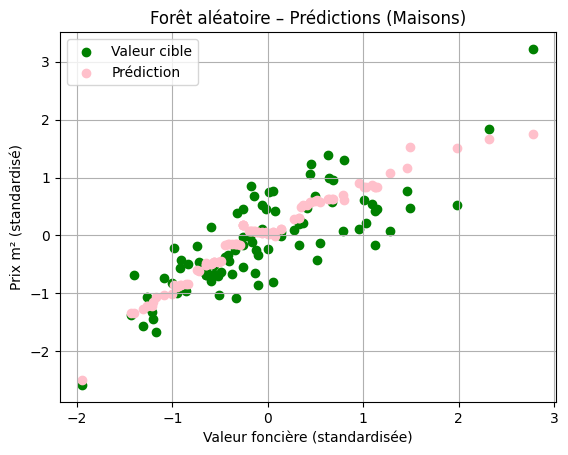

In [73]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("Forêt aléatoire – Prédictions (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [74]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/RandomForestRegressor/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/RandomForestRegressor/maisons//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/RandomForestRegressor/maisons//app_scaler_y.pkl")

['sauvegardes/RandomForestRegressor/maisons//app_scaler_y.pkl']

modèle XGBoost

In [75]:
X = df_appartements[['Valeur fonciere']].values
y = df_appartements[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [77]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid,
    cv=5
)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Appartements) :", grid.best_params_)

Meilleurs paramètres (Appartements) : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}


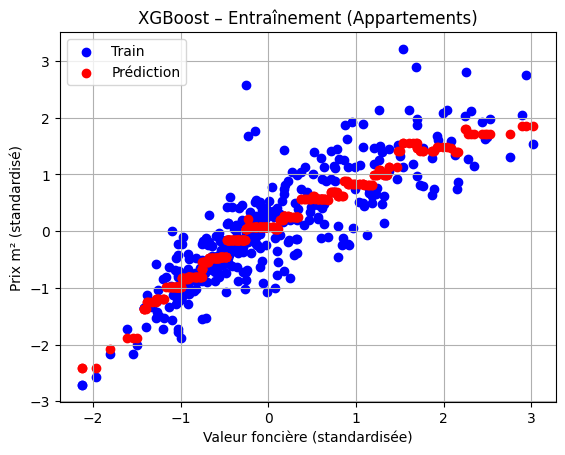

In [78]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled, y_train_pred_scaled, color='red', label='Prédiction')
plt.title("XGBoost – Entraînement (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_xgb_app = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Appartements :", mse_xgb_app)
print("RMSE Appartements :", np.sqrt(mse_xgb_app))
print("R² Appartements :", r2_score(y_test_scaled, y_pred_scaled))

MSE Appartements : 0.23953997565785765
RMSE Appartements : 0.48942821297699796
R² Appartements : 0.6448487818824999


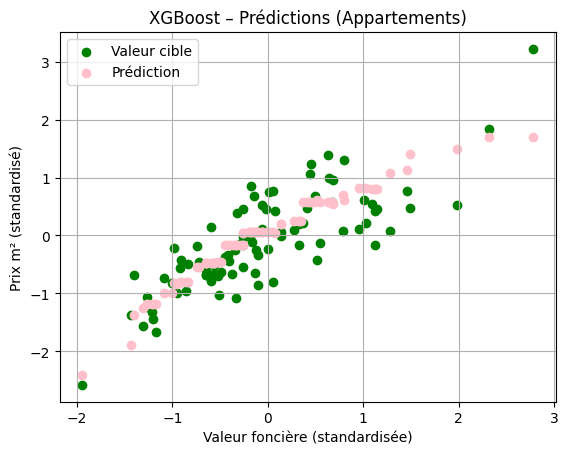

In [80]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("XGBoost – Prédictions (Appartements)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [87]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/XGBRegressor/appartements/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/XGBRegressor/appartements//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/XGBRegressor/appartements//app_scaler_y.pkl")

['sauvegardes/XGBRegressor/appartements//app_scaler_y.pkl']

In [88]:
X = df_maisons[['Valeur fonciere']].values
y = df_maisons[["prix_m2"]].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [90]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.3]
}

grid = GridSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid,
    cv=5
)
grid.fit(X_train_scaled, y_train_scaled.ravel())

model = grid.best_estimator_
print("Meilleurs paramètres (Maisons) :", grid.best_params_)

Meilleurs paramètres (Maisons) : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}


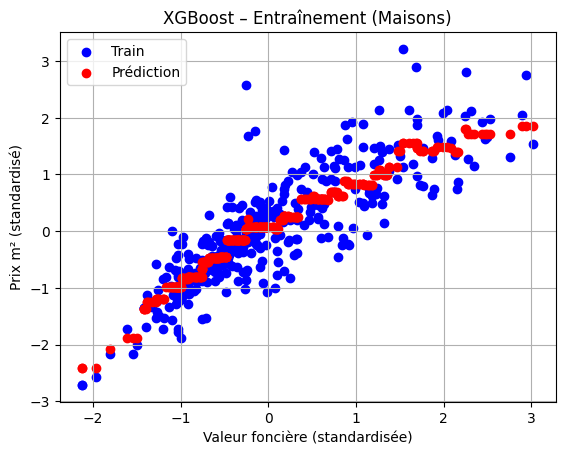

In [91]:
import matplotlib.pyplot as plt

y_train_pred_scaled = model.predict(X_train_scaled)

plt.scatter(X_train_scaled, y_train_scaled, color='blue', label='Train')
plt.scatter(X_train_scaled, y_train_pred_scaled, color='red', label='Prédiction')
plt.title("XGBoost – Entraînement (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred_scaled = model.predict(X_test_scaled)
mse_xgb_mais = mean_squared_error(y_test_scaled, y_pred_scaled)

print("MSE Maisons :", mse_xgb_mais)
print("RMSE Maisons :", np.sqrt(mse_xgb_mais))
print("R² Maisons :", r2_score(y_test_scaled, y_pred_scaled))

MSE Maisons : 0.23953997565785765
RMSE Maisons : 0.48942821297699796
R² Maisons : 0.6448487818824999


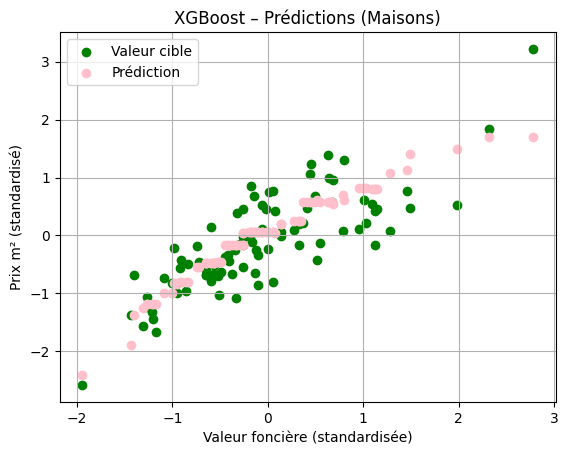

In [93]:
plt.scatter(X_test_scaled, y_test_scaled, color='green', label='Valeur cible')
plt.scatter(X_test_scaled, y_pred_scaled, color='pink', label='Prédiction')
plt.title("XGBoost – Prédictions (Maisons)")
plt.xlabel("Valeur foncière (standardisée)")
plt.ylabel("Prix m² (standardisé)")
plt.legend()
plt.grid(True)
plt.show()

In [94]:
os.makedirs("sauvegardes", exist_ok=True)

joblib.dump(model, "sauvegardes/XGBRegressor/maisons/app_model_regression.pkl")
joblib.dump(scaler_X, "sauvegardes/XGBRegressor/maisons//app_scaler_X.pkl")
joblib.dump(scaler_y, "sauvegardes/XGBRegressor/maisons//app_scaler_y.pkl")

['sauvegardes/XGBRegressor/maisons//app_scaler_y.pkl']

In [95]:
import pandas as pd

# Tableau comparatif avec MSE pour Appartements & Maisons
comparatif = pd.DataFrame({
    "Modèle": [
        "Régression linéaire : LinearRegression",
        "Arbre de décision : DecisionTreeRegressor",
        "Forêt aléatoire : RandomForestRegressor",
        "XGBoost : XGBRegressor"
    ],
    "MSE Appartements": [
        mse_linear_app,
        mse_tree_app,
        mse_forest_app,
        mse_xgb_app
    ],
    "MSE Maisons": [
        mse_linear_mais,
        mse_tree_mais,
        mse_forest_mais,
        mse_xgb_mais
    ]
})

# Mise en forme
comparatif.set_index("Modèle", inplace=True)

# Stylisation propre et lisible
styled_comparatif = comparatif.style\
    .format("{:.4f}")\
    .highlight_min(axis=0, color="#C1F0C1")\
    .highlight_max(axis=0, color="#F8C8DC")\
    .set_properties(**{'color': 'black', 'background-color': 'white'})\
    .set_caption("📊 Comparatif des MSE pour Appartements et Maisons")\
    .set_table_styles([
        {"selector": "caption", "props": [("font-size", "16px"), ("font-weight", "bold")]},
        {"selector": "th", "props": [("color", "black"), ("background-color", "white")]},
        {"selector": "td", "props": [("color", "black"), ("background-color", "white")]}
    ])

# Affichage du tableau
display(styled_comparatif)


,MSE Appartements,MSE Maisons
Modèle,,
Régression linéaire : LinearRegression,0.2416,0.2416
Arbre de décision : DecisionTreeRegressor,0.2522,0.2522
Forêt aléatoire : RandomForestRegressor,0.2484,0.2484
XGBoost : XGBRegressor,0.2395,0.2395
